# Xenium Pre-Processing: Create SpatialData Object and Add Region IDs

**Author:** Bhavya Singh

**Affiliation:** Icahn School of Medicine at Mount Sinai, Brian D. Brown Lab

**Date:** 2025-12-18


# Load Packages

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad
import spatialdata as sd
from spatialdata import SpatialData, read_zarr
from spatialdata_io import xenium

/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/Users/b

# Load Xenium Data as a SpatialData Object

In [2]:
zarr_path = "/Users/bhavyasingh/OneDrive - The Mount Sinai Hospital/Falcomata, Chiara's files - Xenium_Perturbmap/Xenium_Custom2/JMT_ID8"

In [3]:
sdata_xenium = xenium(zarr_path)

INFO     reading /Users/bhavyasingh/OneDrive - The Mount Sinai Hospital/Falcomata, Chiara's files -                
         Xenium_Perturbmap/Xenium_Custom2/JMT_ID8/cell_feature_matrix.h5                                           


/var/folders/1_/_r77s67n7dvfsyc_8t8prtph0000gn/T/ipykernel_60434/2493292733.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata_xenium = xenium(zarr_path)
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/spatialdata_io/_utils.py:47: UserWarning: The "cell_id" column in the cells metadata table does not match the "cell_id" column in the annotation table. This could be due to trying to read a new version that is not supported yet. Please report this issue.
  return f(*args, **kwargs)
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/spatialdata_io/_utils.py:47: UserWarning: The cell_id column in the cell_labels_table does not ma

/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/tifffile/tifffile.py:9107: UserWarning: <tifffile.TiffPage 0 @16> reading array from closed file
  warnings.warn(


### Inspect Data

In [4]:
sdata_xenium

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (4, 112088, 53965), (4, 56044, 26982), (4, 28022, 13491), (4, 14011, 6745), (4, 7005, 3372)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (112088, 53965), (56044, 26982), (28022, 13491), (14011, 6745), (7005, 3372)
│     └── 'nucleus_labels': DataTree[yx] (112088, 53965), (56044, 26982), (28022, 13491), (14011, 6745), (7005, 3372)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (651399, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (651399, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (649479, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (651399, 480)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_bound

In [5]:
sdata_xenium.tables["table"].obs.head()
sdata_xenium.labels.keys()
sdata_xenium.images.keys()

dict_keys(['morphology_focus'])

In [ ]:
adata = sdata_xenium.tables["table"]
adata.obs

,cell_id,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method,region,z_level
0,aaaabldf-1,159,0,0,0,0,0,159,29.035470,20.320313,NaN,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,NaN
1,aaaahbei-1,302,0,0,0,0,0,302,39.015001,22.081407,NaN,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,NaN
2,aaaahhnd-1,248,0,0,0,0,0,248,35.176720,19.191407,NaN,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,NaN
3,aaaaihof-1,224,0,0,0,0,0,224,39.872970,17.565782,NaN,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,NaN
4,aaaaimem-1,522,0,0,0,0,0,522,67.734377,16.572344,NaN,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651394,oimpmbha-1,47,0,0,0,0,0,47,11.198750,8.308750,NaN,Segmented by nucleus expansion of 5.0µm,cell_circles,NaN
651395,oimpohha-1,92,0,0,0,0,0,92,21.042813,21.042813,NaN,Segmented by nucleus expansion of 5.0µm,cell_circles,NaN
651396,oimpoinb-1,2,0,0,0,0,0,2,7.676563,7.676563,NaN,Segmented by nucleus expansion of 5.0µm,cell_circles,NaN
651397,oimppijk-1,26,0,0,0,0,0,26,5.870313,5.870313,NaN,Segmented by nucleus expansion of 5.0µm,cell_circles,NaN


# Create AnnData with Mouse IDs

### Add polygons from Xenium explorer to tag region IDs

In [ ]:
from spatialdata_io import xenium_explorer_selection
from shapely.geometry import Polygon
import geopandas as gpd
from spatialdata.models import ShapesModel

# Set the correct pixel size (default is 0.2125 µm for Xenium)
pixel_size = 0.2125  

# Load the polygon(s) from the Xenium Explorer-exported CSV
polygons = xenium_explorer_selection("/Users/bhavyasingh/OneDrive - The Mount Sinai Hospital/Falcomata, Chiara's files - Xenium_Perturbmap/Xenium_Custom2/JMT_ID8/coordinates.csv", 
                                     pixel_size=0.2125, 
                                     return_list=True)


In [8]:
polygons

[<POLYGON ((12821.314 58016.05, 13571.112 58120.94, 14348.266 58063.961, 1588...>,
 <POLYGON ((17800.743 10669.917, 18206.365 10974.387, 21431.225 16352.858, 21...>,
 <POLYGON ((5976.657 87149.979, 7735.047 87297.713, 8447.69 87335.878, 10833....>,
 <POLYGON ((39197.288 41846.068, 40459.011 42645.137, 41543.51 42908.525, 427...>,
 <POLYGON ((41462.022 83972.533, 42817.924 82295.801, 43366.741 81064.135, 45...>,
 <POLYGON ((41454.522 1043.841, 42064.505 1264.589, 42585.617 1454.307, 42985...>]

In [9]:
# Load and skip first two lines of metadata
region_coords = pd.read_csv("/Users/bhavyasingh/OneDrive - The Mount Sinai Hospital/Falcomata, Chiara's files - Xenium_Perturbmap/Xenium_Custom2/JMT_ID8/coordinates.csv", skiprows=2)


In [22]:
region_names = ["2LL", "2L", "2RR", "3N", "3L", "3R"]
treatments   = ["Control", "Control", "Control", "Treated", "Treated", "Treated"]

gdf = gpd.GeoDataFrame({
    "geometry": polygons,
    "Region_ID": region_names,
    "Treatment": treatments
})
# Rebuild the ShapesModel with same transformation (already global)
from spatialdata.models import ShapesModel
from spatialdata.transformations import Identity  # or keep same transform if it's already correct

shapes_model = ShapesModel.parse(gdf, transformations={"global": Identity()})
sdata_xenium.shapes["tumor_regions"] = shapes_model


/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `tumor_regions` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [23]:
sdata_xenium

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (4, 112088, 53965), (4, 56044, 26982), (4, 28022, 13491), (4, 14011, 6745), (4, 7005, 3372)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (112088, 53965), (56044, 26982), (28022, 13491), (14011, 6745), (7005, 3372)
│     └── 'nucleus_labels': DataTree[yx] (112088, 53965), (56044, 26982), (28022, 13491), (14011, 6745), (7005, 3372)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (651399, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (651399, 2) (2D shapes)
│     ├── 'nucleus_boundaries': GeoDataFrame shape: (649479, 1) (2D shapes)
│     └── 'tumor_regions': GeoDataFrame shape: (6, 3) (2D shapes)
└── Tables
      └── 'table': AnnData (641951, 480)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Point

In [24]:
sdata_xenium.shapes["tumor_regions"]

,geometry,Region_ID,Treatment
0,"POLYGON ((12821.314 58016.05, 13571.112 58120....",2LL,Control
1,"POLYGON ((17800.743 10669.917, 18206.365 10974...",2L,Control
2,"POLYGON ((5976.657 87149.979, 7735.047 87297.7...",2RR,Control
3,"POLYGON ((39197.288 41846.068, 40459.011 42645...",3N,Treated
4,"POLYGON ((41462.022 83972.533, 42817.924 82295...",3L,Treated
5,"POLYGON ((41454.522 1043.841, 42064.505 1264.5...",3R,Treated


In [25]:
# it's important for the index to be unique
assert sdata_xenium["table"].obs.index.is_unique

In [26]:
adata.obsm["spatial"][:5]

array([[8091.31640625, 1594.32983398],
       [8094.71972656, 1605.28393555],
       [8093.26269531, 1599.86193848],
       [8181.25195312, 1648.82226562],
       [8170.97070312, 1663.77087402]])

### Sanity check with Napari

In [ ]:
from napari_spatialdata import Interactive
interactive = Interactive(sdata_xenium)

interactive.run()

2025-08-12 16:29:13.085 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-08-12 16:29:14.609 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-08-12 16:29:14.614 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
2025-08-12 16:29:43.095 python[32261:2176278] +[CATransaction synchronize] called within transaction
2025-08-12 16:30:05.339 python[32261:2176278] +[CATransaction synchronize] called within transaction
2025-08-12 16:30:09.440 python[32261:2176278] +[CATransaction synchronize] called within transaction
2025-08-12 16:30:09.455 

In [27]:
adata.obs

,cell_id,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,...,Treatment,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes,n_counts,n_genes
0,aaaabldf-1,159,0,0,0,0,0,159.0,29.035470,20.320313,...,Treated,82,4.418841,5.075174,42.767296,57.861635,79.874214,100.000000,159.0,82
1,aaaahbei-1,302,0,0,0,0,0,302.0,39.015001,22.081407,...,Treated,117,4.770685,5.713733,36.423841,50.993377,76.490066,100.000000,302.0,117
2,aaaahhnd-1,248,0,0,0,0,0,248.0,35.176720,19.191407,...,Treated,113,4.736198,5.517453,34.274194,50.806452,74.596774,100.000000,248.0,113
3,aaaaihof-1,224,0,0,0,0,0,224.0,39.872970,17.565782,...,Treated,96,4.574711,5.416101,42.410714,56.250000,79.464286,100.000000,224.0,96
4,aaaaimem-1,522,0,0,0,0,0,522.0,67.734377,16.572344,...,Treated,175,5.170484,6.259582,27.777778,41.187739,64.176245,95.210728,522.0,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651383,oimokhnc-1,53,0,0,0,0,0,53.0,9.392500,9.392500,...,Control,35,3.583519,3.988984,52.830189,71.698113,100.000000,100.000000,53.0,35
651384,oimoknnc-1,68,0,0,0,0,0,68.0,12.282500,12.282500,...,Control,43,3.784190,4.234107,42.647059,66.176471,100.000000,100.000000,68.0,43
651388,oimpaeil-1,59,0,0,0,0,0,59.0,12.508282,12.508282,...,Control,40,3.713572,4.094345,47.457627,66.101695,100.000000,100.000000,59.0,40
651394,oimpmbha-1,47,0,0,0,0,0,47.0,11.198750,8.308750,...,Control,34,3.555348,3.871201,48.936170,70.212766,100.000000,100.000000,47.0,34


### Map everything back to the AnnData to ensure correct annotation

In [28]:
from shapely.affinity import scale
import geopandas as gpd

# Get original elements (keeping them unchanged)
cell_shapes = sdata_xenium.shapes['cell_boundaries']
tumor_regions = sdata_xenium.shapes["tumor_regions"]  # Keep original in pixels
adata = sdata_xenium.tables['table']

# Create a temporary scaled version just for annotation
pixel_size = 0.2125  # µm per pixel
tumor_regions_temp = tumor_regions.copy()
tumor_regions_temp['geometry'] = tumor_regions_temp['geometry'].apply(
    lambda geom: scale(geom, xfact=pixel_size, yfact=pixel_size, origin=(0, 0))
)

# Perform spatial join with the temporary scaled version
print("Performing spatial join with temporarily scaled regions...")
cells_annotated = gpd.sjoin(
    cell_shapes,
    tumor_regions_temp,  # Use temporary scaled version
    how='left',
    predicate='within'
)

# Create mapping dictionaries
region_mapping = cells_annotated['Region_ID'].to_dict()
treatment_mapping = cells_annotated['Treatment'].to_dict()

# Map to adata using cell_id
adata.obs['Region_ID'] = adata.obs['cell_id'].map(region_mapping).fillna('Outside')
adata.obs['Treatment'] = adata.obs['cell_id'].map(treatment_mapping).fillna('None')

# Save the annotated adata back to spatialdata
sdata_xenium.tables['table'] = adata

print("\nResults:")
print(adata.obs['Region_ID'].value_counts())
print("\nTreatment distribution:")
print(adata.obs['Treatment'].value_counts())

# Verify that original tumor_regions are unchanged
print("\nOriginal tumor regions still in pixel coordinates:")
for idx, region in sdata_xenium.shapes["tumor_regions"].iterrows():
    bounds = region.geometry.bounds
    print(f"{region['Region_ID']}: X({bounds[0]:.2f}, {bounds[2]:.2f})")

Performing spatial join with temporarily scaled regions...

Results:
Region_ID
2LL        137859
3N         137500
3L         122286
3R         114204
2L          73955
2RR         56140
Outside         7
Name: count, dtype: int64

Treatment distribution:
Treatment
Treated    373990
Control    267954
None            7
Name: count, dtype: int64

Original tumor regions still in pixel coordinates:
2LL: X(-1783.95, 32176.41)
2L: X(783.36, 30958.95)
2RR: X(2492.24, 27053.07)
3N: X(32455.85, 53511.07)
3L: X(32585.65, 56804.42)
3R: X(31203.02, 51508.59)


/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [29]:
adata.obs["Region_ID"].value_counts()

Region_ID
2LL        137859
3N         137500
3L         122286
3R         114204
2L          73955
2RR         56140
Outside         7
Name: count, dtype: int64

/Users/bhavyasingh/miniconda3/envs/napari-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


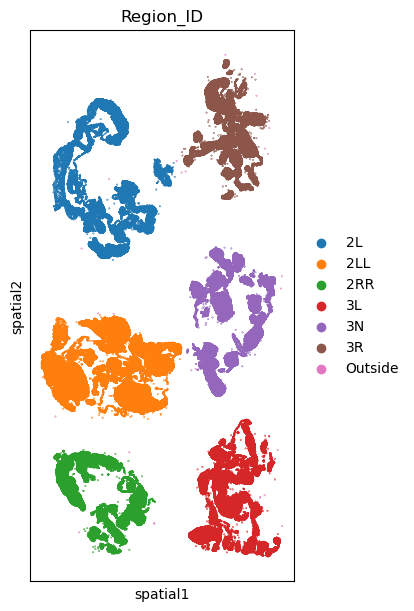

In [103]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",shape=None,
    color="Region_ID",
    figsize=(7, 6),
    dpi=100)

### Export Final SpatialData object

In [32]:
from pathlib import Path
f = Path(zarr_path) / "jmt.zarr"
sdata_xenium.write(f, overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: /Users/bhavyasingh/OneDrive - The    
         Mount Sinai Hospital/Falcomata, Chiara's files - Xenium_Perturbmap/Xenium_Custom2/JMT_ID8/jmt.zarr        
